In [75]:
import pandas as pd
import math
import numpy as np

In [76]:
%config IPCompleter.greedy = True

In [77]:
df = pd.read_csv("./RAW_DATA/segments.csv")

In [78]:
df = df.sort_values(by=['trip_id','stop_sequence'])

In [79]:
df.head()

,trip_id,arrival_time,departure_time,stop_sequence,stop_name,stop_lat,stop_lon
0,1.y1003.60-38-b12-1.178.I,08:11:27,08:11:27,8,"Parslickstown Ave, stop 1829",53.406199,-6.395346
1,1.y1003.60-38-b12-1.178.I,08:32:39,08:32:39,24,"Auburn Avenue, stop 4899",53.372389,-6.358549
2,1.y1003.60-38-b12-1.178.I,08:34:30,08:34:30,26,"Auburn Green, stop 4746",53.379509,-6.358651
3,1.y1003.60-38-b12-1.178.I,08:37:00,08:37:00,28,"Parkway Station, stop 7166",53.377094,-6.345787
4,1.y1003.60-38-b12-1.178.I,08:48:19,08:48:19,42,"Annamoe Terrace, stop 78",53.361149,-6.284066


In [80]:
df.shape

(112054, 7)

In [81]:
df.dtypes

trip_id            object
arrival_time       object
departure_time     object
stop_sequence       int64
stop_name          object
stop_lat          float64
stop_lon          float64
dtype: object

In [82]:
datetime_columns = df[['arrival_time', 'departure_time']].columns

for column in datetime_columns:
    df[column] = pd.to_timedelta(df[column])  
    
df.dtypes

trip_id                    object
arrival_time      timedelta64[ns]
departure_time    timedelta64[ns]
stop_sequence               int64
stop_name                  object
stop_lat                  float64
stop_lon                  float64
dtype: object

In [83]:
stop_nums = []
for stop in df['stop_name']:
    try:
        num = int(stop.split(" ")[-1])
        stop_nums.append(num)
    except ValueError as e:
        print(stop, "has no number")
        stop_nums.append(np.nan)

Hearse Road R126 has no number


In [84]:
stop_nums

[1829,
 4899,
 4746,
 7166,
 78,
 80,
 6059,
 7339,
 4606,
 7015,
 4554,
 2156,
 6154,
 6141,
 7043,
 2186,
 2188,
 1436,
 2190,
 2383,
 7622,
 407,
 2508,
 7132,
 6228,
 6273,
 137,
 168,
 141,
 143,
 184,
 186,
 188,
 190,
 1288,
 1290,
 1090,
 2414,
 2416,
 2418,
 2452,
 2457,
 7132,
 6228,
 6273,
 137,
 168,
 141,
 143,
 184,
 186,
 188,
 190,
 1288,
 1290,
 1090,
 2414,
 2416,
 2418,
 2452,
 2457,
 7132,
 6228,
 6273,
 137,
 168,
 141,
 143,
 184,
 186,
 188,
 190,
 1288,
 1290,
 1090,
 2414,
 2416,
 2418,
 2452,
 2457,
 7132,
 6228,
 6273,
 137,
 168,
 141,
 143,
 184,
 186,
 188,
 190,
 1288,
 1290,
 1090,
 2414,
 2416,
 2418,
 2452,
 2457,
 7132,
 6228,
 6273,
 137,
 168,
 141,
 143,
 184,
 186,
 188,
 190,
 1288,
 1290,
 1090,
 2414,
 2416,
 2418,
 2452,
 2457,
 4643,
 4645,
 6095,
 6075,
 2359,
 4348,
 4647,
 2377,
 3952,
 2380,
 5099,
 497,
 4385,
 4695,
 4383,
 4388,
 1266,
 1268,
 7132,
 6228,
 6273,
 137,
 168,
 141,
 143,
 184,
 186,
 188,
 190,
 1288,
 1290,
 1090,
 241

In [85]:
df['stop_name'] = stop_nums

In [86]:
df.head()

,trip_id,arrival_time,departure_time,stop_sequence,stop_name,stop_lat,stop_lon
0,1.y1003.60-38-b12-1.178.I,08:11:27,08:11:27,8,1829.0,53.406199,-6.395346
1,1.y1003.60-38-b12-1.178.I,08:32:39,08:32:39,24,4899.0,53.372389,-6.358549
2,1.y1003.60-38-b12-1.178.I,08:34:30,08:34:30,26,4746.0,53.379509,-6.358651
3,1.y1003.60-38-b12-1.178.I,08:37:00,08:37:00,28,7166.0,53.377094,-6.345787
4,1.y1003.60-38-b12-1.178.I,08:48:19,08:48:19,42,78.0,53.361149,-6.284066


In [87]:
df = df[df['stop_name'].notna()]

In [88]:
df.shape

(112053, 7)

In [89]:
df['journeytime'] = df['arrival_time'].diff()

In [90]:
previous_stop = [None] + list(df["stop_name"][:len(df) - 1].values)
previous_lat = [None] + list(df["stop_lat"][:len(df) - 1].values)
previous_lon = [None] + list(df["stop_lon"][:len(df) - 1].values)

In [91]:
df["previous_stop"] = previous_stop
df["previous_lat"] = previous_lat
df["previous_lon"] = previous_lon

In [92]:
df = df.drop(list(df[['trip_id']].drop_duplicates().index))

In [93]:
df

,trip_id,arrival_time,departure_time,stop_sequence,stop_name,stop_lat,stop_lon,journeytime,previous_stop,previous_lat,previous_lon
1,1.y1003.60-38-b12-1.178.I,08:32:39,08:32:39,24,4899.0,53.372389,-6.358549,00:21:12,1829.0,53.406199,-6.395346
2,1.y1003.60-38-b12-1.178.I,08:34:30,08:34:30,26,4746.0,53.379509,-6.358651,00:01:51,4899.0,53.372389,-6.358549
3,1.y1003.60-38-b12-1.178.I,08:37:00,08:37:00,28,7166.0,53.377094,-6.345787,00:02:30,4746.0,53.379509,-6.358651
4,1.y1003.60-38-b12-1.178.I,08:48:19,08:48:19,42,78.0,53.361149,-6.284066,00:11:19,7166.0,53.377094,-6.345787
5,1.y1003.60-38-b12-1.178.I,08:50:20,08:50:20,44,80.0,53.360863,-6.276054,00:02:01,78.0,53.361149,-6.284066
...,...,...,...,...,...,...,...,...,...,...,...
112049,9998.y1005.60-9-b12-1.14.I,23:34:29,23:34:29,55,129.0,53.389890,-6.271423,00:02:28,29.0,53.383488,-6.265669
112050,9998.y1005.60-9-b12-1.14.I,23:35:37,23:35:37,57,131.0,53.390386,-6.278349,00:01:08,129.0,53.389890,-6.271423
112051,9998.y1005.60-9-b12-1.14.I,23:38:22,23:38:22,61,7458.0,53.390067,-6.290526,00:02:45,131.0,53.390386,-6.278349
112052,9998.y1005.60-9-b12-1.14.I,23:39:44,23:39:44,63,4376.0,53.392408,-6.292732,00:01:22,7458.0,53.390067,-6.290526


In [94]:
df["previous_stop"] = df["previous_stop"].astype("int64")

In [95]:
df["stop_name"] = df["stop_name"].astype("int64")

In [96]:
df

,trip_id,arrival_time,departure_time,stop_sequence,stop_name,stop_lat,stop_lon,journeytime,previous_stop,previous_lat,previous_lon
1,1.y1003.60-38-b12-1.178.I,08:32:39,08:32:39,24,4899,53.372389,-6.358549,00:21:12,1829,53.406199,-6.395346
2,1.y1003.60-38-b12-1.178.I,08:34:30,08:34:30,26,4746,53.379509,-6.358651,00:01:51,4899,53.372389,-6.358549
3,1.y1003.60-38-b12-1.178.I,08:37:00,08:37:00,28,7166,53.377094,-6.345787,00:02:30,4746,53.379509,-6.358651
4,1.y1003.60-38-b12-1.178.I,08:48:19,08:48:19,42,78,53.361149,-6.284066,00:11:19,7166,53.377094,-6.345787
5,1.y1003.60-38-b12-1.178.I,08:50:20,08:50:20,44,80,53.360863,-6.276054,00:02:01,78,53.361149,-6.284066
...,...,...,...,...,...,...,...,...,...,...,...
112049,9998.y1005.60-9-b12-1.14.I,23:34:29,23:34:29,55,129,53.389890,-6.271423,00:02:28,29,53.383488,-6.265669
112050,9998.y1005.60-9-b12-1.14.I,23:35:37,23:35:37,57,131,53.390386,-6.278349,00:01:08,129,53.389890,-6.271423
112051,9998.y1005.60-9-b12-1.14.I,23:38:22,23:38:22,61,7458,53.390067,-6.290526,00:02:45,131,53.390386,-6.278349
112052,9998.y1005.60-9-b12-1.14.I,23:39:44,23:39:44,63,4376,53.392408,-6.292732,00:01:22,7458,53.390067,-6.290526


In [97]:
df["segment"] = df["previous_stop"].astype(str) + "_" + df["stop_name"].astype(str)

In [98]:
df

,trip_id,arrival_time,departure_time,stop_sequence,stop_name,stop_lat,stop_lon,journeytime,previous_stop,previous_lat,previous_lon,segment
1,1.y1003.60-38-b12-1.178.I,08:32:39,08:32:39,24,4899,53.372389,-6.358549,00:21:12,1829,53.406199,-6.395346,1829_4899
2,1.y1003.60-38-b12-1.178.I,08:34:30,08:34:30,26,4746,53.379509,-6.358651,00:01:51,4899,53.372389,-6.358549,4899_4746
3,1.y1003.60-38-b12-1.178.I,08:37:00,08:37:00,28,7166,53.377094,-6.345787,00:02:30,4746,53.379509,-6.358651,4746_7166
4,1.y1003.60-38-b12-1.178.I,08:48:19,08:48:19,42,78,53.361149,-6.284066,00:11:19,7166,53.377094,-6.345787,7166_78
5,1.y1003.60-38-b12-1.178.I,08:50:20,08:50:20,44,80,53.360863,-6.276054,00:02:01,78,53.361149,-6.284066,78_80
...,...,...,...,...,...,...,...,...,...,...,...,...
112049,9998.y1005.60-9-b12-1.14.I,23:34:29,23:34:29,55,129,53.389890,-6.271423,00:02:28,29,53.383488,-6.265669,29_129
112050,9998.y1005.60-9-b12-1.14.I,23:35:37,23:35:37,57,131,53.390386,-6.278349,00:01:08,129,53.389890,-6.271423,129_131
112051,9998.y1005.60-9-b12-1.14.I,23:38:22,23:38:22,61,7458,53.390067,-6.290526,00:02:45,131,53.390386,-6.278349,131_7458
112052,9998.y1005.60-9-b12-1.14.I,23:39:44,23:39:44,63,4376,53.392408,-6.292732,00:01:22,7458,53.390067,-6.290526,7458_4376


In [99]:
#https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
import geopy.distance

distance = []
for i in range(len(df)):
    cord1 = (df["stop_lat"].iloc[i], df["stop_lon"].iloc[i])
    cord2 = (df["previous_lat"].iloc[i], df["previous_lon"].iloc[i])
    distance.append(geopy.distance.distance(cord1, cord2).km)

In [100]:
df["distance"] = distance

In [101]:
df.head()

,trip_id,arrival_time,departure_time,stop_sequence,stop_name,stop_lat,stop_lon,journeytime,previous_stop,previous_lat,previous_lon,segment,distance
1,1.y1003.60-38-b12-1.178.I,08:32:39,08:32:39,24,4899,53.372389,-6.358549,00:21:12,1829,53.406199,-6.395346,1829_4899,4.489100
2,1.y1003.60-38-b12-1.178.I,08:34:30,08:34:30,26,4746,53.379509,-6.358651,00:01:51,4899,53.372389,-6.358549,4899_4746,0.792421
3,1.y1003.60-38-b12-1.178.I,08:37:00,08:37:00,28,7166,53.377094,-6.345787,00:02:30,4746,53.379509,-6.358651,4746_7166,0.897272
4,1.y1003.60-38-b12-1.178.I,08:48:19,08:48:19,42,78,53.361149,-6.284066,00:11:19,7166,53.377094,-6.345787,7166_78,4.475216
5,1.y1003.60-38-b12-1.178.I,08:50:20,08:50:20,44,80,53.360863,-6.276054,00:02:01,78,53.361149,-6.284066,78_80,0.534348


In [102]:
dropped = ["trip_id","arrival_time","departure_time","stop_sequence","stop_name","stop_lat","stop_lon", "previous_stop" ,"previous_lat","previous_lon"]

In [103]:
df = df.drop(columns=dropped)

In [104]:
df = df.drop_duplicates()

In [105]:
df["journeytime"] = df["journeytime"].astype("int64")

In [106]:
df

,journeytime,segment,distance
1,1272000000000,1829_4899,4.489100
2,111000000000,4899_4746,0.792421
3,150000000000,4746_7166,0.897272
4,679000000000,7166_78,4.475216
5,121000000000,78_80,0.534348
...,...,...,...
112020,670000000000,4_149,2.291806
112023,189000000000,29_129,0.808846
112024,77000000000,129_131,0.464099
112025,184000000000,131_7458,0.810884


In [141]:
X = df[["distance", "journeytime"]]
y = df["segment"]

In [142]:
from sklearn.cluster import KMeans
import numpy as np

In [156]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [160]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 25)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

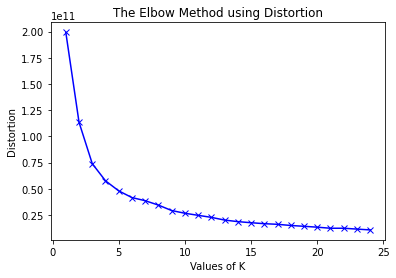

In [167]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [162]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(X)

In [163]:
result = X.copy()
result["category"] = list(kmeans.labels_)

In [164]:
from matplotlib import pyplot as plt
import seaborn as sns

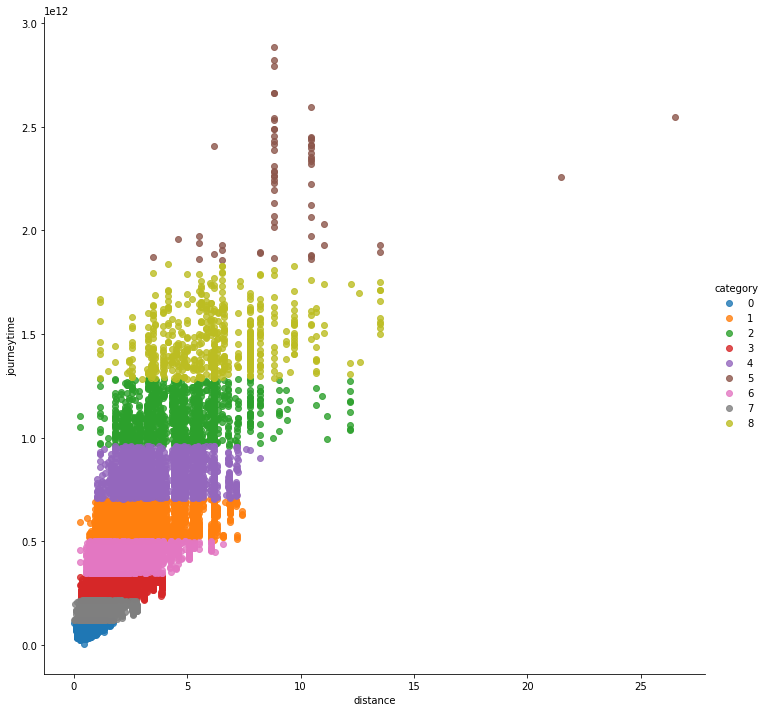

In [165]:
sns.lmplot(x='distance', y='journeytime', data=result, hue='category', fit_reg=False,height=10)

In [169]:
result["segment"] = y

,segment,category
1,1829_4899,2
2,4899_4746,0
3,4746_7166,7
4,7166_78,1
5,78_80,7
...,...,...
112020,4_149,1
112023,29_129,7
112024,129_131,0
112025,131_7458,7


In [176]:
segment_categories = result[["segment","category"]].set_index('segment').to_dict()['category']

In [177]:
#https://stackoverflow.com/questions/11218477/how-can-i-use-pickle-to-save-a-dict
import pickle

with open('segment_categories.pickle', 'wb') as handle:
    pickle.dump(segment_categories, handle, protocol=pickle.HIGHEST_PROTOCOL)